In [1]:
import pandas as pd

data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skill_lists = pd.DataFrame(data)

df_skill_lists

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


<Axes: xlabel='job_skills'>

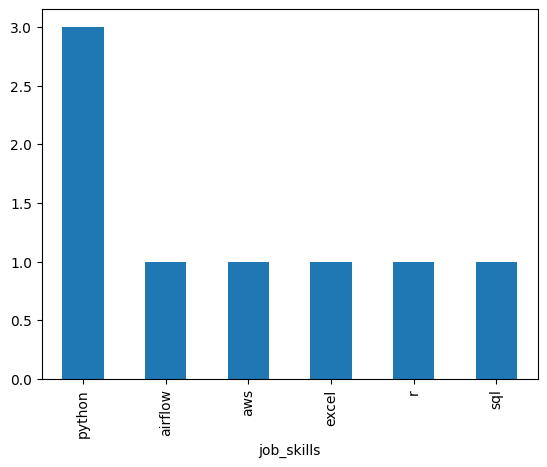

In [11]:
df_skill_lists.explode('job_skills').value_counts('job_skills').plot(kind='bar')

In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load_Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Date_CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\user\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Tue Jun 10 20:06:45 2025).


In [3]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [11]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

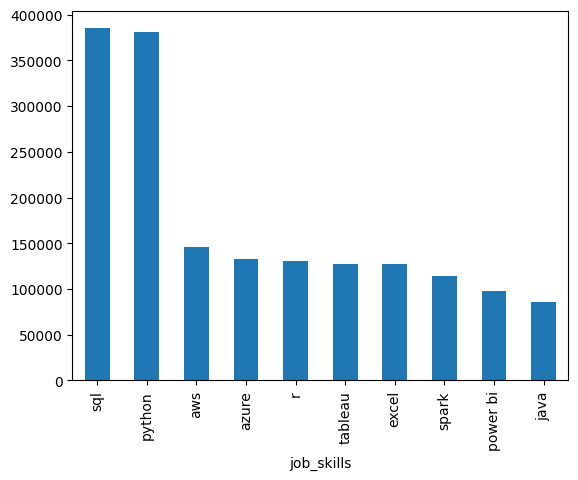

In [22]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [37]:
df_skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skills_counts')

In [44]:
df_skills_count[df_skills_count['job_title_short'] == 'Data Analyst']

,job_title_short,job_skills,skills_counts
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
...,...,...,...
567,Data Analyst,nuxt.js,1
553,Data Analyst,msaccess,1
493,Data Analyst,esquisse,1
459,Data Analyst,capacitor,1


In [42]:
df_skills_count = df_skills_count.sort_values(by='skills_counts', ascending=False)

In [48]:
job_title = 'Data Analyst'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final

,job_title_short,job_skills,skills_counts
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


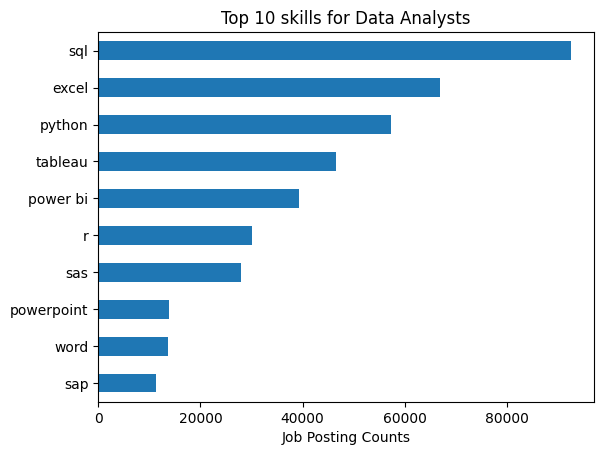

In [56]:
df_skill_final.plot(kind='barh', x='job_skills', y='skills_counts')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job_title}s')
plt.xlabel('Job Posting Counts')
plt.ylabel('') 
plt.legend().set_visible(False)